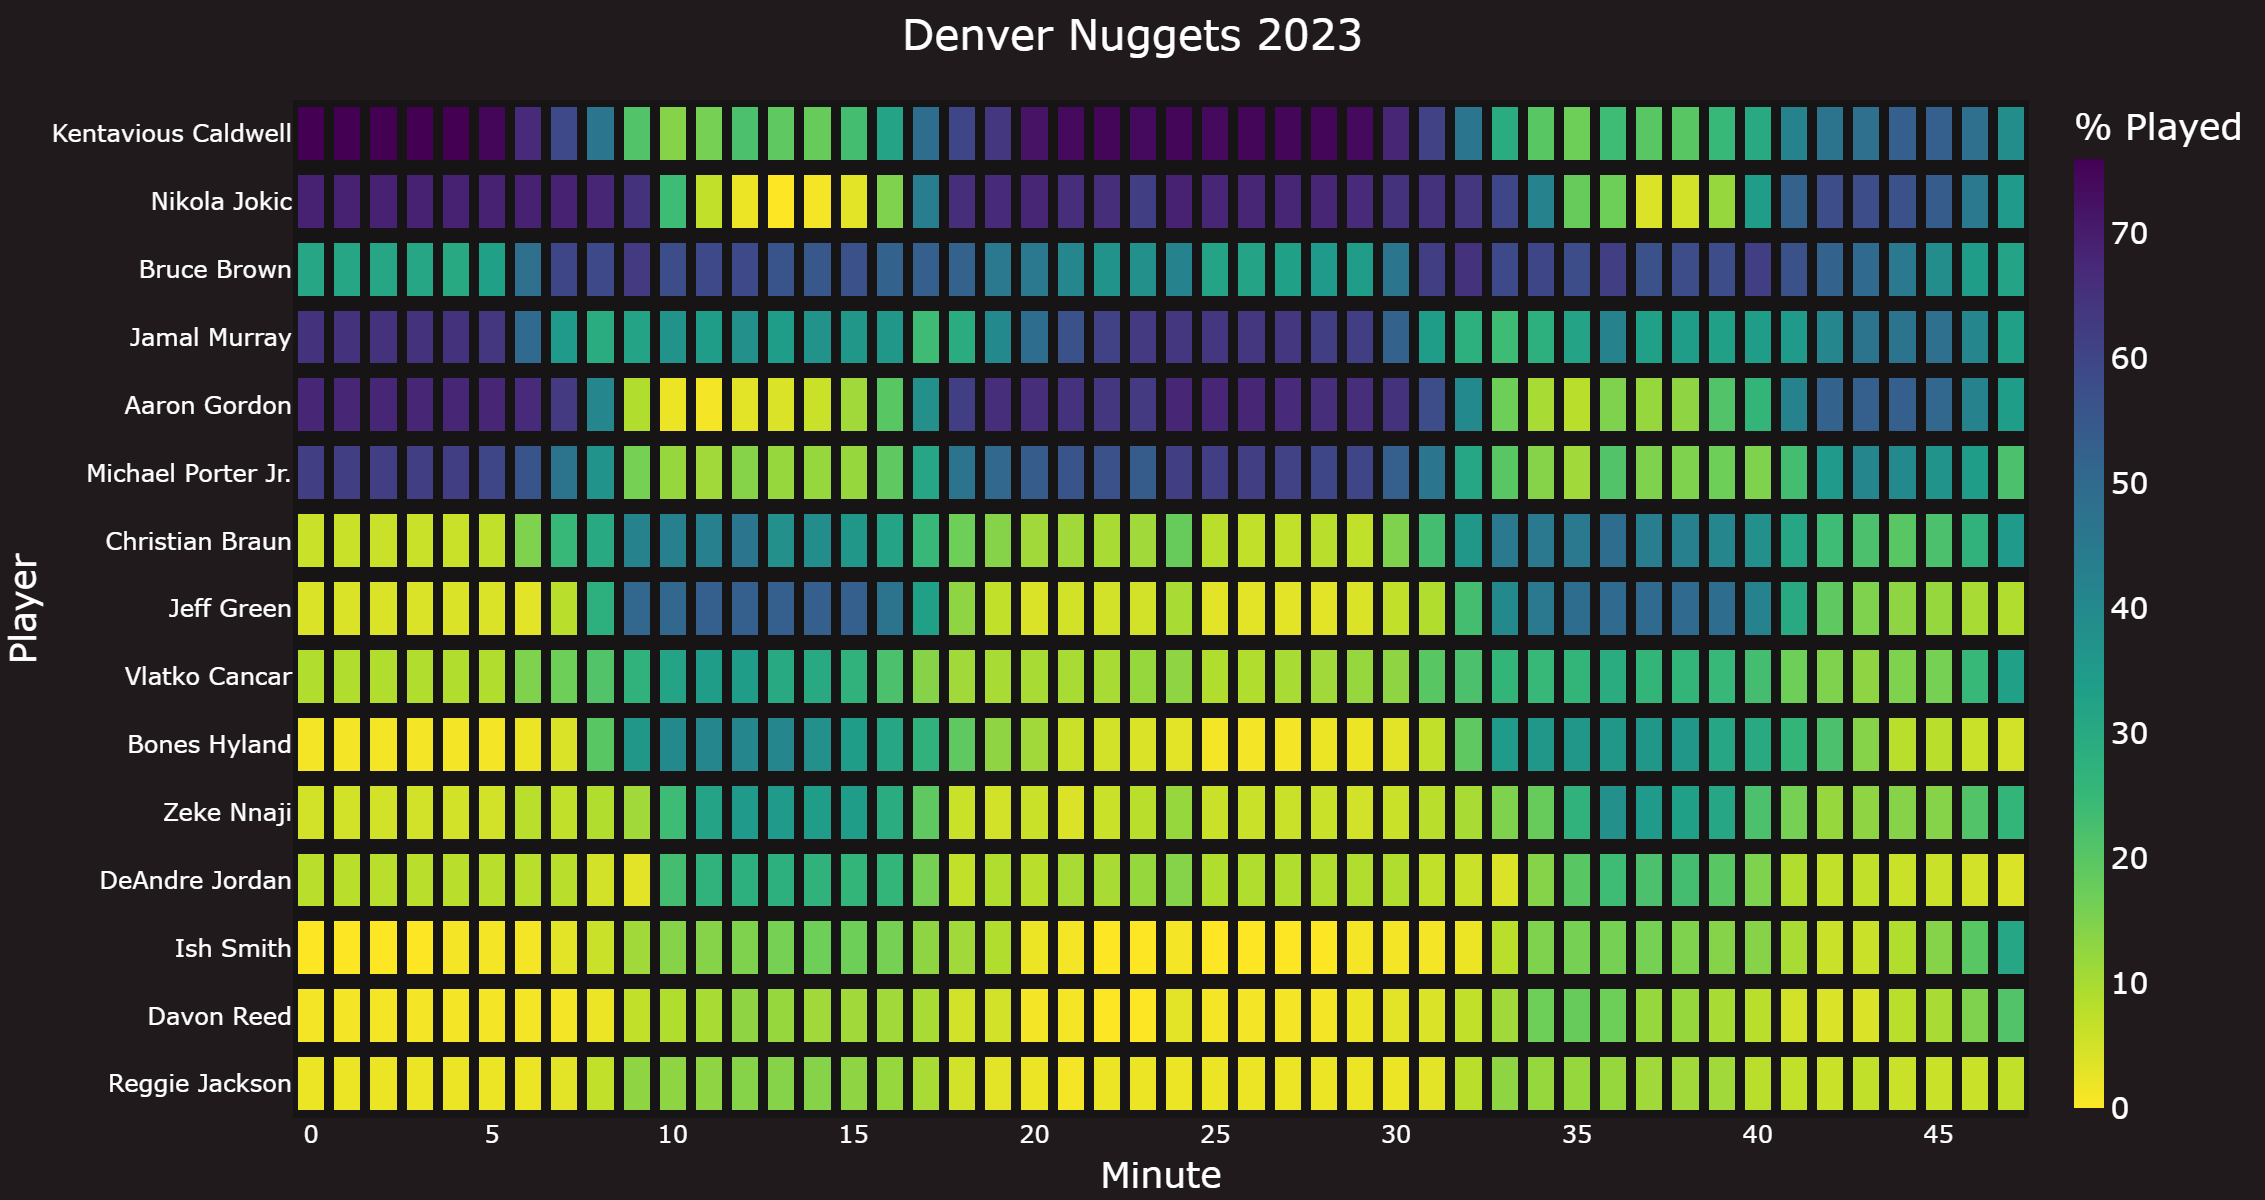

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nba_api.stats.static import players,teams
import plotly.graph_objects as go
import time

def update_matrices(row):

    player = row['Player']
    start_minute = row['start']
    end_minute = row['end']
    plus_minus = row['PT_DIFF']

    # Increment the matrix based on player on-court times
    minutes_played_matrix.loc[player, start_minute:end_minute] += 1

    # Increment the plus_minus_matrix based on player on-court times
    plus_minus_matrix.loc[player, start_minute:end_minute] += plus_minus

def graph_rotation(team,year):

    team = team.upper()

    nba_teams = teams.get_teams()
    team_list= {}
    full_name = {}
    for org in nba_teams:
        team_list[org['abbreviation']] = org['id']
        full_name[org['abbreviation']] = org['full_name']
    
    


    team_id = team_list[team]
    url='https://raw.githubusercontent.com/gabriel1200/shot_data/master/rotations/'+str(year)+'/'+str(team_id)+'.csv'
    title = full_name[team]+ ' '+str(year)
    df = pd.read_csv(url)
    # Convert the times to seconds
    df['start'] = df['IN_TIME_REAL']
    df['end'] = df['OUT_TIME_REAL']
    df['Player'] = df['PLAYER_FIRST']+' '+df['PLAYER_LAST'].str.split('-').str[0]
    df['start'] /=600
    df['end']/=600

    df =df.drop_duplicates()
    max_end_minute =int( df['end'].max())
    #max_end_minute=48
    players = df['Player'].unique()

    # Use pd.cut to create intervals and groupby to perform the summation

    # Print or use the result as needed
    #print(test_matrix)
    # Create an empty matrix to represent player minutes played

    #start_time1 = time.time()
    
    minutes_played_matrix=  pd.DataFrame(index=players, columns=[i for i in range(max_end_minute + 1)], data=0)
    
    plus_minus_matrix=  pd.DataFrame(index=players, columns=[i for i in range(max_end_minute + 1)], data=0)


    #plus_minus_matrix=  pd.DataFrame(index=players, columns=[i for i in range(max_end_minute + 1)], data=0)
    #df['interval'] = df.apply(lambda row: pd.Interval(row['start'], row['end'], closed='right'), axis=1)
    #df.apply(update_matrices, axis=1)
    #print(minutes_played_matrix)
    #end_time1 = time.time()

    #df['interval'] = df.apply(lambda row: pd.interval_range(row['start'], row['end'], freq=1), axis=1)

    # Increment the matrix based on player on-court times
    #minutes_played_matrix = df.groupby(['Player', 'interval']).size().unstack(fill_value=0).cumsum(axis=1)

    # Increment the plus_minus_matrix based on player on-court times
    #plus_minus_matrix = df.groupby(['Player', 'interval'])['PT_DIFF'].sum().unstack(fill_value=0).cumsum(axis=1)
    #print(minutes_played_matrix)


    # Increment the matrix based on player on-court times

    for _, row in df.iterrows():
        player = row['Player']
        start_minute = row['start']
        end_minute = row['end']
        plus_minus = row['PT_DIFF']

        minutes_played_matrix.loc[player, start_minute:end_minute] += 1
        plus_minus_matrix.loc[player, start_minute:end_minute] += plus_minus
    #minutes_played_matrix = minutes_played_matrix[[i for i in range(0,49)]]
    #plus_minus_matrix = plus_minus_matrix[[i for i in range(0,49)]]
    #print(minutes_played_matrix)
    #test_matrix=plus_minus_matrix / minutes_played_matrix



    #print(f"Execution time For Loop: {end_time1 - start_time1} seconds")
    #print(f"Execution time Apply: {end_time2 - start_time2} seconds")

    #print(test_matrix.sum())
    #eam_plus = plus_minus_matrix.sum(axis=0) / minutes_played_matrix.sum(axis=0)
    #print(team_plus.sum().sum())
    #print(test_matrix.sum().sum())
    #print(team_plus)
    #print(team_plus)
    minutes_played_matrix['total']= minutes_played_matrix.iloc[:].sum(axis=1)
    minutes_played_matrix.sort_values(by='total',inplace=True,ascending=True)
    minutes_played_matrix=minutes_played_matrix[minutes_played_matrix['total']>300]
    #print(minutes_played_matrix['total'])
    #minutes_played_matrix.drop(columns='total',inplace=True)
    
    #print(plus_minus_matrix.iloc[0].sum())

    # Create the heatmap
    #minutes_played_matrix.sort_index(axis=22,inplace=True)
    minutes_played_matrix = minutes_played_matrix[[i for i in range(0,48)]]
    fig = go.Figure(data=go.Heatmap(z=minutes_played_matrix.values,
                                    x=minutes_played_matrix.columns,
                                    y=minutes_played_matrix.index,
                                    xgap=10,
                                    ygap=15,
                                    type='heatmap',
                                    colorscale='viridis_r',
                                     colorbar=dict(
                title="% Played")


            ))
    fig.update_yaxes(tickfont=dict(color='white',size = 24),showgrid=False,zeroline=False)
    fig.update_xaxes(tickfont=dict(color='white',size = 24),showgrid=False,zeroline=False)
    # Customize the layout
    fig.update_layout(title=title,
                      title_x=.5,
                          plot_bgcolor='#161415',
                          paper_bgcolor='#211a1d',

                      width=1800,
                      height=1200,
                      font=dict(color='white',size = 30),
                      xaxis_title='Minute',
                      yaxis_title='Player')
    del minutes_played_matrix
    del plus_minus_matrix
    # Show the plot
    return fig
fig = graph_rotation('den',2023)
fig.show()



In [29]:
team = 'bos'
year = 2023
team = team.upper()

nba_teams = teams.get_teams()
team_list= {}
full_name = {}
for org in nba_teams:
    team_list[org['abbreviation']] = org['id']
    full_name[org['abbreviation']] = org['full_name']




team_id = team_list[team]
url='https://raw.githubusercontent.com/gabriel1200/shot_data/master/rotations/'+str(year)+'/'+str(team_id)+'.csv'


df = pd.read_csv(url)
df['start'] = df['IN_TIME_REAL']
df['end'] = df['OUT_TIME_REAL']
df['Player'] = df['PLAYER_FIRST']+' '+df['PLAYER_LAST'].str.split('-').str[0]
df['start'] /=600
df['end']/=600


# Create a DataFrame to represent each minute played by each player in each game
minutes_df = pd.concat([pd.Series(row['GAME_ID'], range(int(row['start']), int(row['end']))) for _, row in df.iterrows()])

# Merge with the original DataFrame to get the point differential for each minute
minutes_df = minutes_df.reset_index().rename(columns={'index': 'Minute', 0: 'GAME_ID'})
merged_df = pd.merge(minutes_df, df[['GAME_ID', 'TEAM_ID', 'PT_DIFF']], on=['GAME_ID'])

# Calculate the total point differential for each minute played
total_diff_per_minute = merged_df.groupby(['TEAM_ID', 'Minute'])['PT_DIFF'].sum().reset_index()

# Calculate the average point differential for each minute throughout the season
average_diff_per_minute = total_diff_per_minute.groupby('Minute')['PT_DIFF'].mean().reset_index()

# Print the result
print(average_diff_per_minute)

    Minute  PT_DIFF
0        0  13345.0
1        1  13345.0
2        2  13345.0
3        3  13345.0
4        4  13345.0
5        5  13345.0
6        6  13345.0
7        7  13345.0
8        8  13345.0
9        9  13345.0
10      10  13345.0
11      11  13345.0
12      12  13345.0
13      13  13345.0
14      14  13345.0
15      15  13345.0
16      16  13345.0
17      17  13345.0
18      18  13345.0
19      19  13345.0
20      20  13345.0
21      21  13345.0
22      22  13345.0
23      23  13345.0
24      24  13345.0
25      25  13345.0
26      26  13345.0
27      27  13345.0
28      28  13345.0
29      29  13345.0
30      30  13345.0
31      31  13345.0
32      32  13345.0
33      33  13345.0
34      34  13345.0
35      35  13345.0
36      36  13345.0
37      37  13345.0
38      38  13345.0
39      39  13345.0
40      40  13345.0
41      41  13345.0
42      42  13345.0
43      43  13345.0
44      44  13345.0
45      45  13345.0
46      46  13345.0
47      47  13345.0
48      48   -380.0
